### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. load dataset of House Price Prediction Dataset

In [3]:
# Load dataset
df = pd.read_csv(r"D:/dataset/housing-price-prediction.zip")

# Display the first 5 rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Preprocessing (checking nulls)
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# 2.Split data into train-test sets.

### Feature selection

In [6]:
# Select features and target
X = df[['area']]   # Simple Linear Regression: 'area' = size of the house
y = df['price']  # Target: 'price' of the house

### Split Data into Train and Test Sets

In [9]:
# frist you can Import require libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Fit a Linear Regression Model

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 4. Evaluate the Model

In [11]:
y_pred = model.predict(X_test)

In [12]:
# Calculate Evaluation Metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

In [14]:
print("Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Model Evaluation Metrics:
Mean Absolute Error (MAE): 1474748.1337969352
Mean Squared Error (MSE): 3675286604768.185
R2 Score: 0.27287851871974644


# 5. Plot Regression Line and Interpret Coefficients

#### Scatter plot

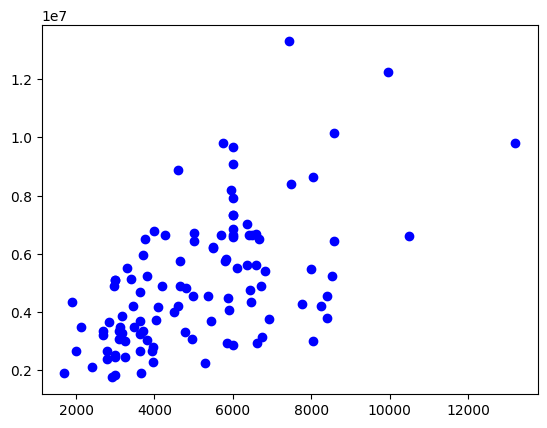

In [16]:
plt.scatter(X_test, y_test, color='blue', label='Actual values')

### Regression line

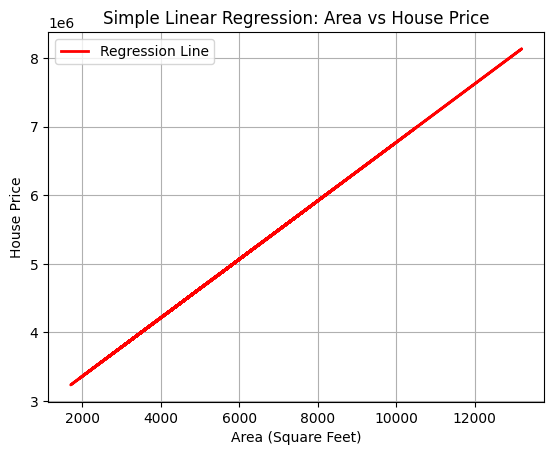

In [17]:
# Regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: Area vs House Price')
plt.xlabel('Area (Square Feet)')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()

#### Print Coefficient and Intercept

In [18]:
print("\nModel Coefficients:")
print(f"Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


Model Coefficients:
Coefficient (Slope): 425.73
Intercept: 2512254.26


# >>Plot Actual vs Predicted values

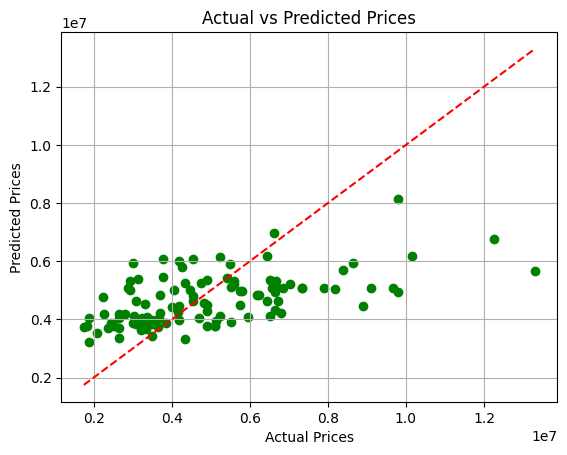

In [19]:
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

# >>Plot Residuals (Errors)

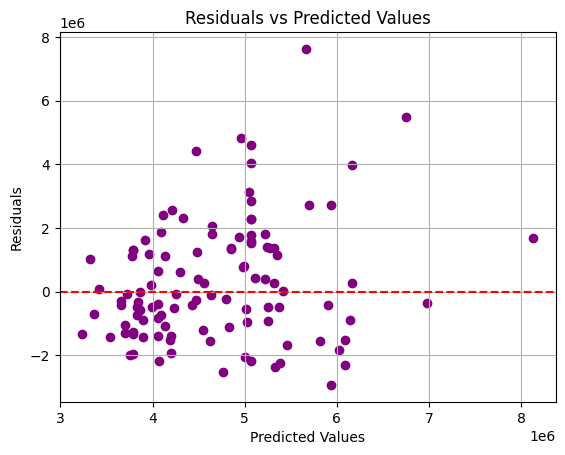

In [20]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()